The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
1
results/BEST/MGDL_grade1_lrparams5.00e-03_beta1.00e-01_lambd1.00e-01_psnr2.5432e+01_loss4.2707e+01.pickle
----------------results/BEST/MGDL_grade1_lrparams5.00e-03_beta1.00e-01_lambd1.00e-01_psnr2.5432e+01_loss4.2707e+01.pickle-----------------
noise level: 0.011764705882352941
dict_keys(['grade1'])


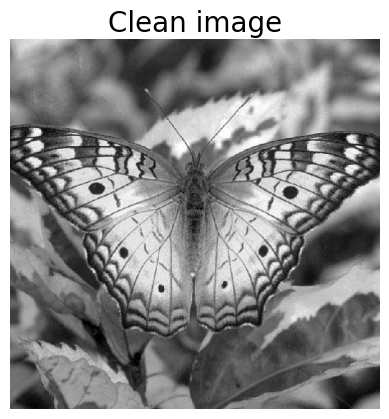

Kernel size is: (19, 19)


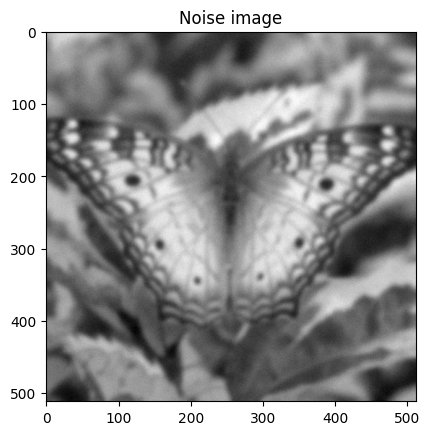

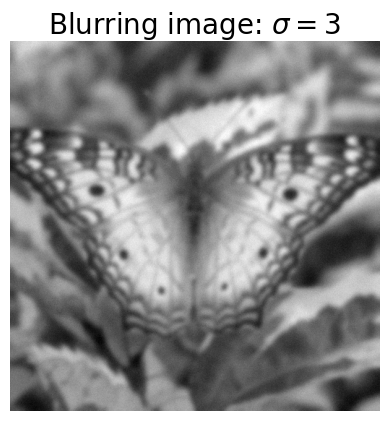

/home/rfang002/EigenvalueComputationHessian/MGDLEXAMPLE/IMAGEdeblurring/Butterfly/SGDL_Blurring3/mgdlmodel.py:60: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  noisyPSNR = psnr(img, train_y)


noisy PSNR 24.61538947364684
at grade 1, PSNR is 25.43245506286621, train_losses is 42.70716094970703, scaleFactor is 0.028159698471426964, time: 1173.774670600891


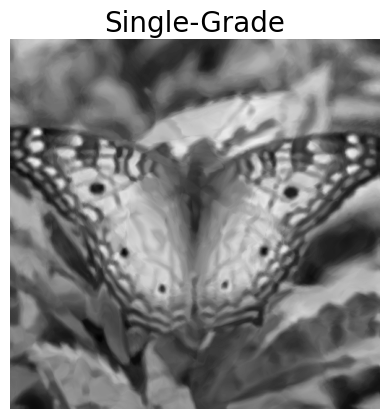

the total time is 1173.774670600891


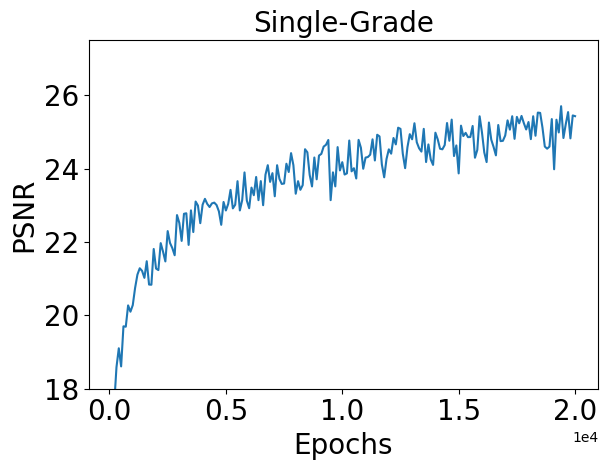

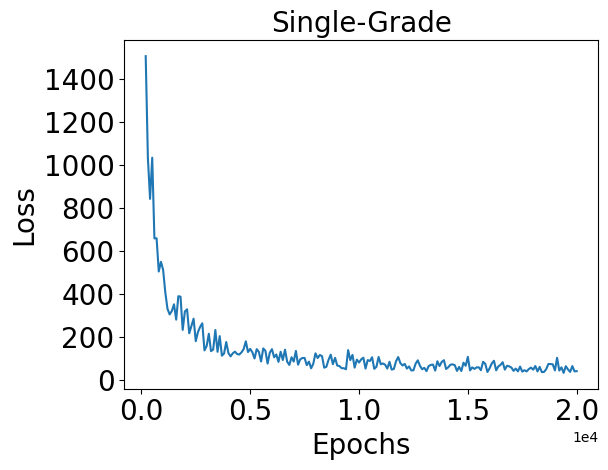

In [5]:
from mgdlmodel import analysis, data_setup
import glob
import shutil
import pickle
import os

%matplotlib inline
%load_ext autoreload
%autoreload 2

grade = 4
savefilename = False

# path = 'results/*.pickle'

path = 'results/BEST/*.pickle'

picklefile = []
for file in glob.glob(path):  
    picklefile.append(file) 

print(len(picklefile))
k=5
picklefile =sorted(picklefile, key=lambda x: float(x.split('_')[k][len("psnr"):len("psnr2.0129e+01")]), reverse=True)

output_txt = f'results/grade{grade}_sorted_PSNR.txt'
if savefilename:
    with open(output_txt, 'w') as f:
        for file in picklefile:
            f.write(file + '\n')  #

for file in picklefile:
    #resave(file)
    print(file)

LossPsnr_print = True
Fig_print = True
# num = len(picklefile)
num = min(10, len(picklefile))
for i in range(num):
    filepath = picklefile[i]
    print(f'----------------{filepath}-----------------')
    analysis(filepath, LossPsnr_print, Fig_print, grade)
    # resave(filepath, grade)

%reset -f